In [1]:
# Data Processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [4]:
df=pd.read_csv('../../data/raw/airport.csv')
df.drop("To Date", axis=1, inplace=True)
df.head()

,From Date,NH3,SO2,CO,Ozone,Benzene,PM2.5,PM10,NO,NO2,NOx,Eth-Benzene,MP-Xylene,O,WS,WD,BP,AT
0,01-06-2019 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-06-2019 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-06-2019 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-06-2019 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-06-2019 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


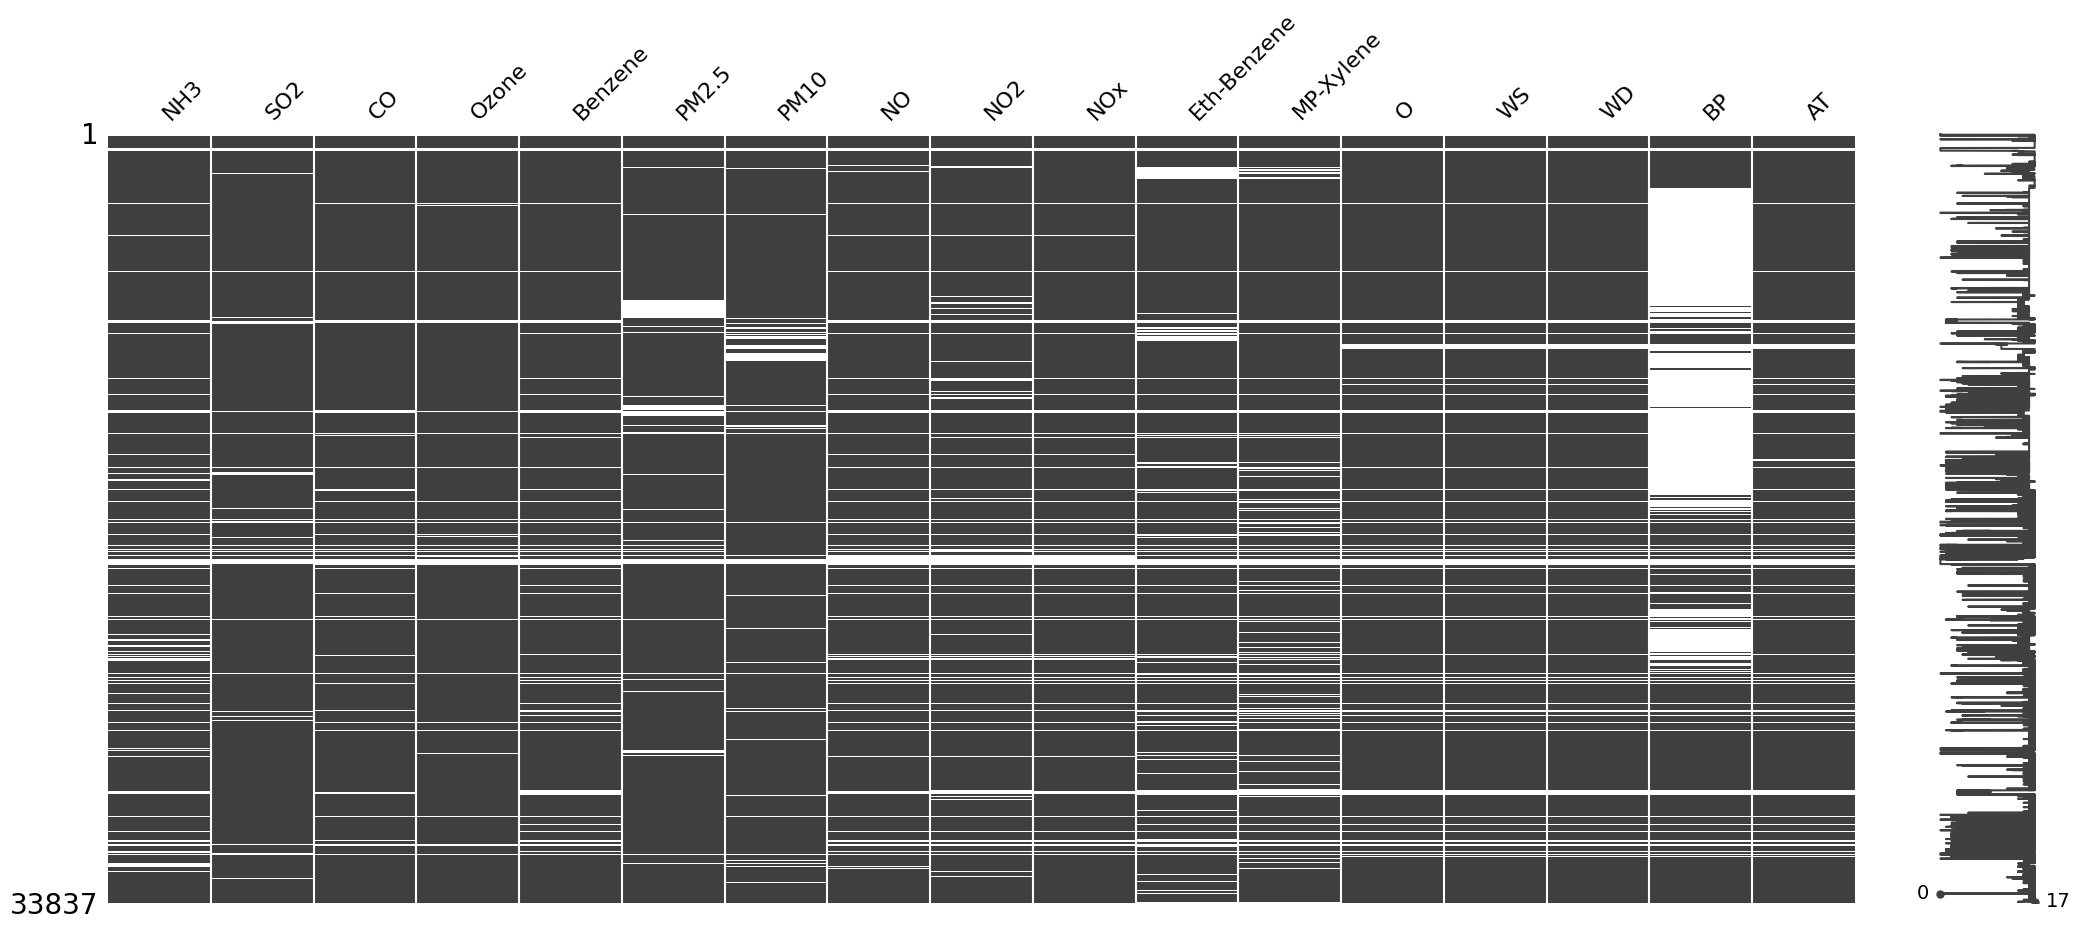

In [5]:
msno.matrix(df.iloc[:,1:])
plt.show()

In [6]:
df.drop("BP", axis=1, inplace=True)

<AxesSubplot:>

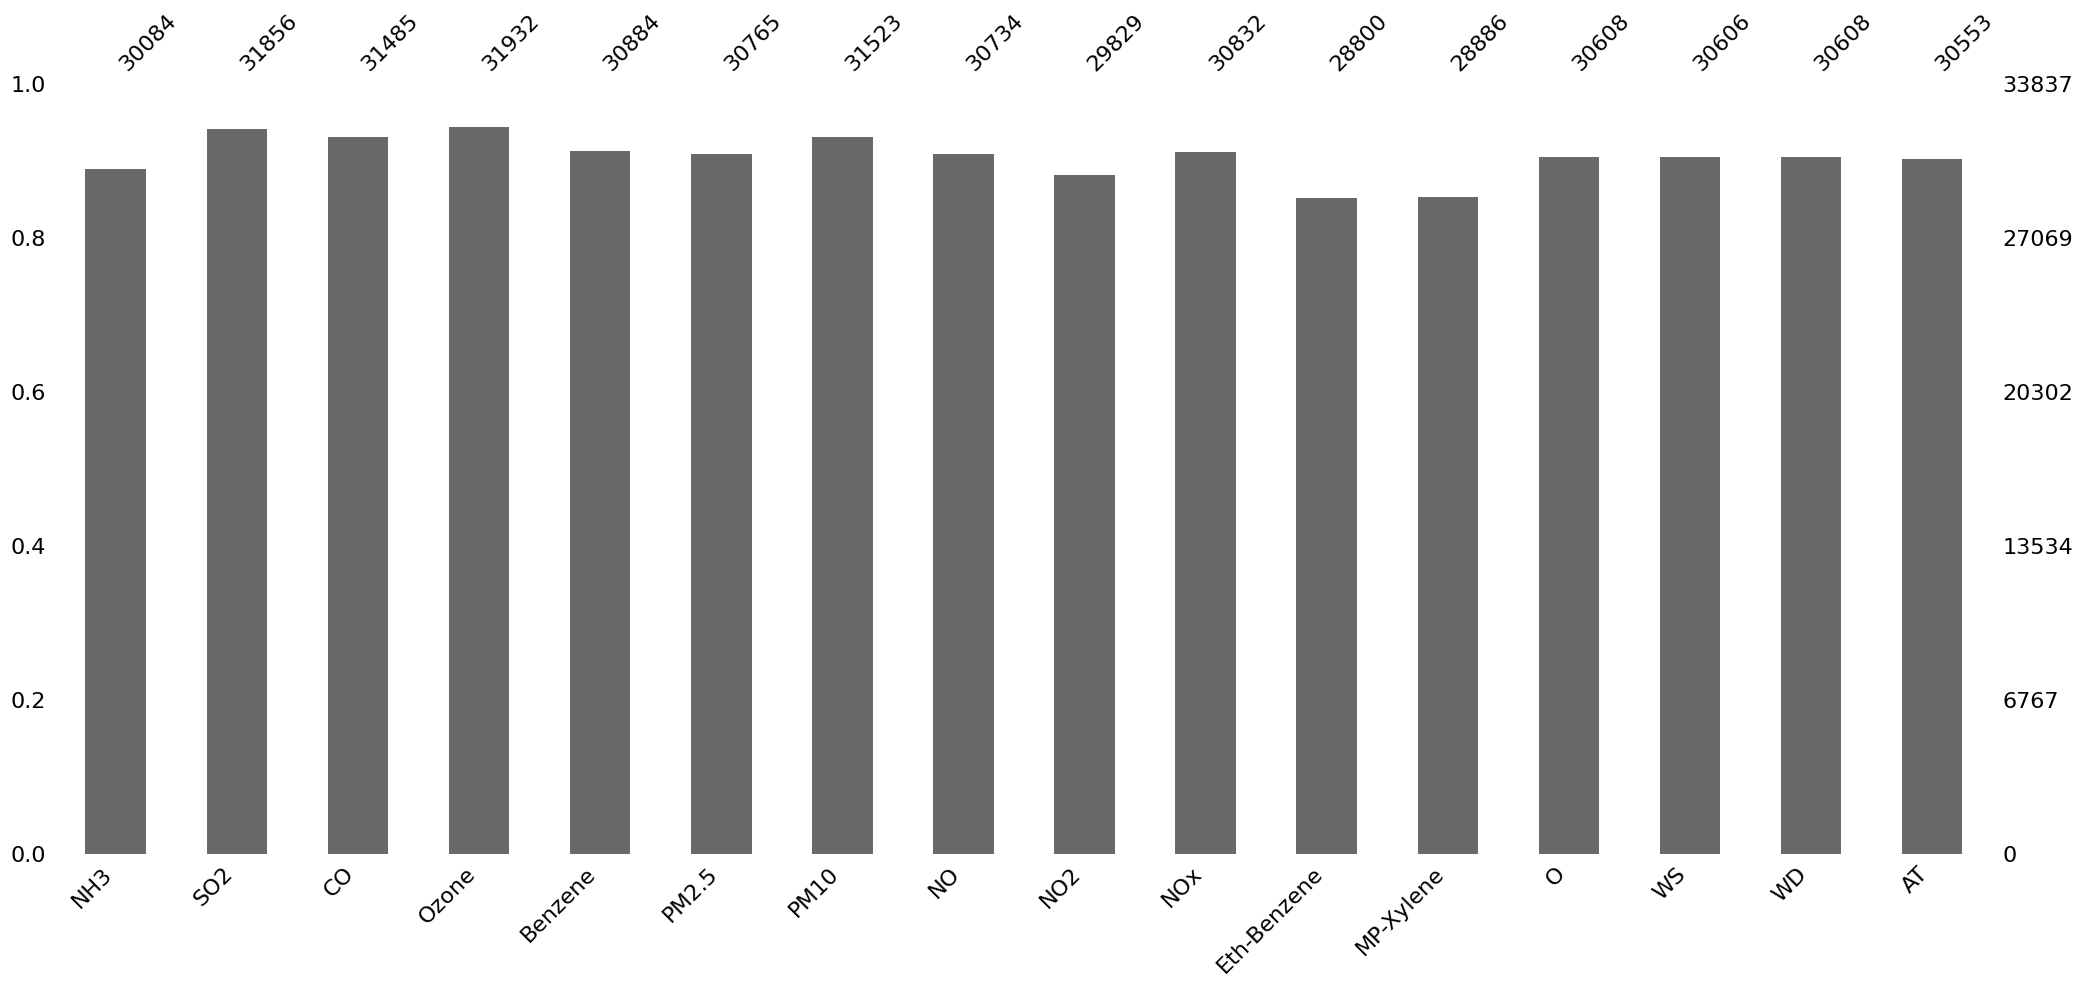

In [7]:
msno.bar(df.iloc[:,1:])

In [8]:
df['HOUR']=df['From Date'].apply(lambda x: int(x.split(' ')[1][:2]))
df.HOUR.head()

0    0
1    1
2    2
3    3
4    4
Name: HOUR, dtype: int64

In [9]:
df['From Date'] = pd.to_datetime(df['From Date'], format = '%d-%m-%Y %H:%M')
df['From Date']

0       2019-06-01 00:00:00
1       2019-06-01 01:00:00
2       2019-06-01 02:00:00
3       2019-06-01 03:00:00
4       2019-06-01 04:00:00
                ...        
33832   2023-04-10 16:00:00
33833   2023-04-10 17:00:00
33834   2023-04-10 18:00:00
33835   2023-04-10 19:00:00
33836   2023-04-10 20:00:00
Name: From Date, Length: 33837, dtype: datetime64[ns]

In [10]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date         0
NH3            3753
SO2            1981
CO             2352
Ozone          1905
Benzene        2953
PM2.5          3072
PM10           2314
NO             3103
NO2            4008
NOx            3005
Eth-Benzene    5037
MP-Xylene      4951
O              3229
WS             3231
WD             3229
AT             3284
HOUR              0
dtype: int64


In [11]:
df.set_index('From Date',inplace=True)

In [12]:
df['MONTH']=df.index.month     #Create month column (Run once)
df.reset_index(inplace=True)

In [13]:
cols=['NH3','SO2','CO','Ozone','Benzene','PM2.5','PM10','NO','NO2','NOx','Eth-Benzene','MP-Xylene','O','WS','WD','AT']
for col in cols:
  df[col]=df[col].fillna(df.groupby(['MONTH','HOUR'])[col].transform('mean'))

In [14]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date      0
NH3            0
SO2            0
CO             0
Ozone          0
Benzene        0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
Eth-Benzene    0
MP-Xylene      0
O              0
WS             0
WD             0
AT             0
HOUR           0
MONTH          0
dtype: int64


In [15]:
df.to_csv('../../data/processed/airport_cleaned.csv', index=False)